# Fish Weight Prediction Project




## Project Description


This project aims to predict the weight of fish based on their physical dimensions. Accurate prediction of fish weight is valuable in various fields such as fisheries management, aquaculture, and ecological studies. By using linear regression, we can create a model that estimates the weight of fish given their lengths, height, and width.



## Objectives


- To understand the relationship between the physical dimensions of fish and their weight.


- To build a predictive model using linear regression to estimate fish weight based on these dimensions.


- To evaluate the performance of the model and identify areas for improvement.



## Column's


The dataset contains the following columns:

1. **Species**: The species of the fish (all entries in the sample are 'Bream').
    
    
2. **Weight**: The weight of the fish in grams (target variable).
    
    
3. **Length1**: Vertical length of the fish in cm.
    
    
4. **Length2**: Diagonal length of the fish in cm.
    
    
5. **Length3**: Cross length of the fish in cm.
    
    
6. **Height**: Height of the fish in cm.
    
    
7. **Width**: Diagonal width of the fish in cm.


## Importing Libraries 

In [180]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

## Loading Dataset

In [181]:
df = pd.read_csv("C:\\Users\\Khan Mokhit\\Downloads\\Fish.csv")

## Data Sample

In [182]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Understanding The Data set 

#### Columns

In [215]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [223]:
# Information of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


#### Numerical Description Of Dataset

In [211]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


#### Data Types

In [212]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

#### Correlation Between All The Features

In [213]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


#### Checking for Null values

In [214]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#### Checking for Duplicate Entries

In [221]:
df[df.duplicated()]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [219]:
df.duplicated().sum()

0

#### Shape of the Data 

In [222]:
df.shape

(159, 7)

# Data Analysis And Visualizations

In [225]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Distribution of Every Features

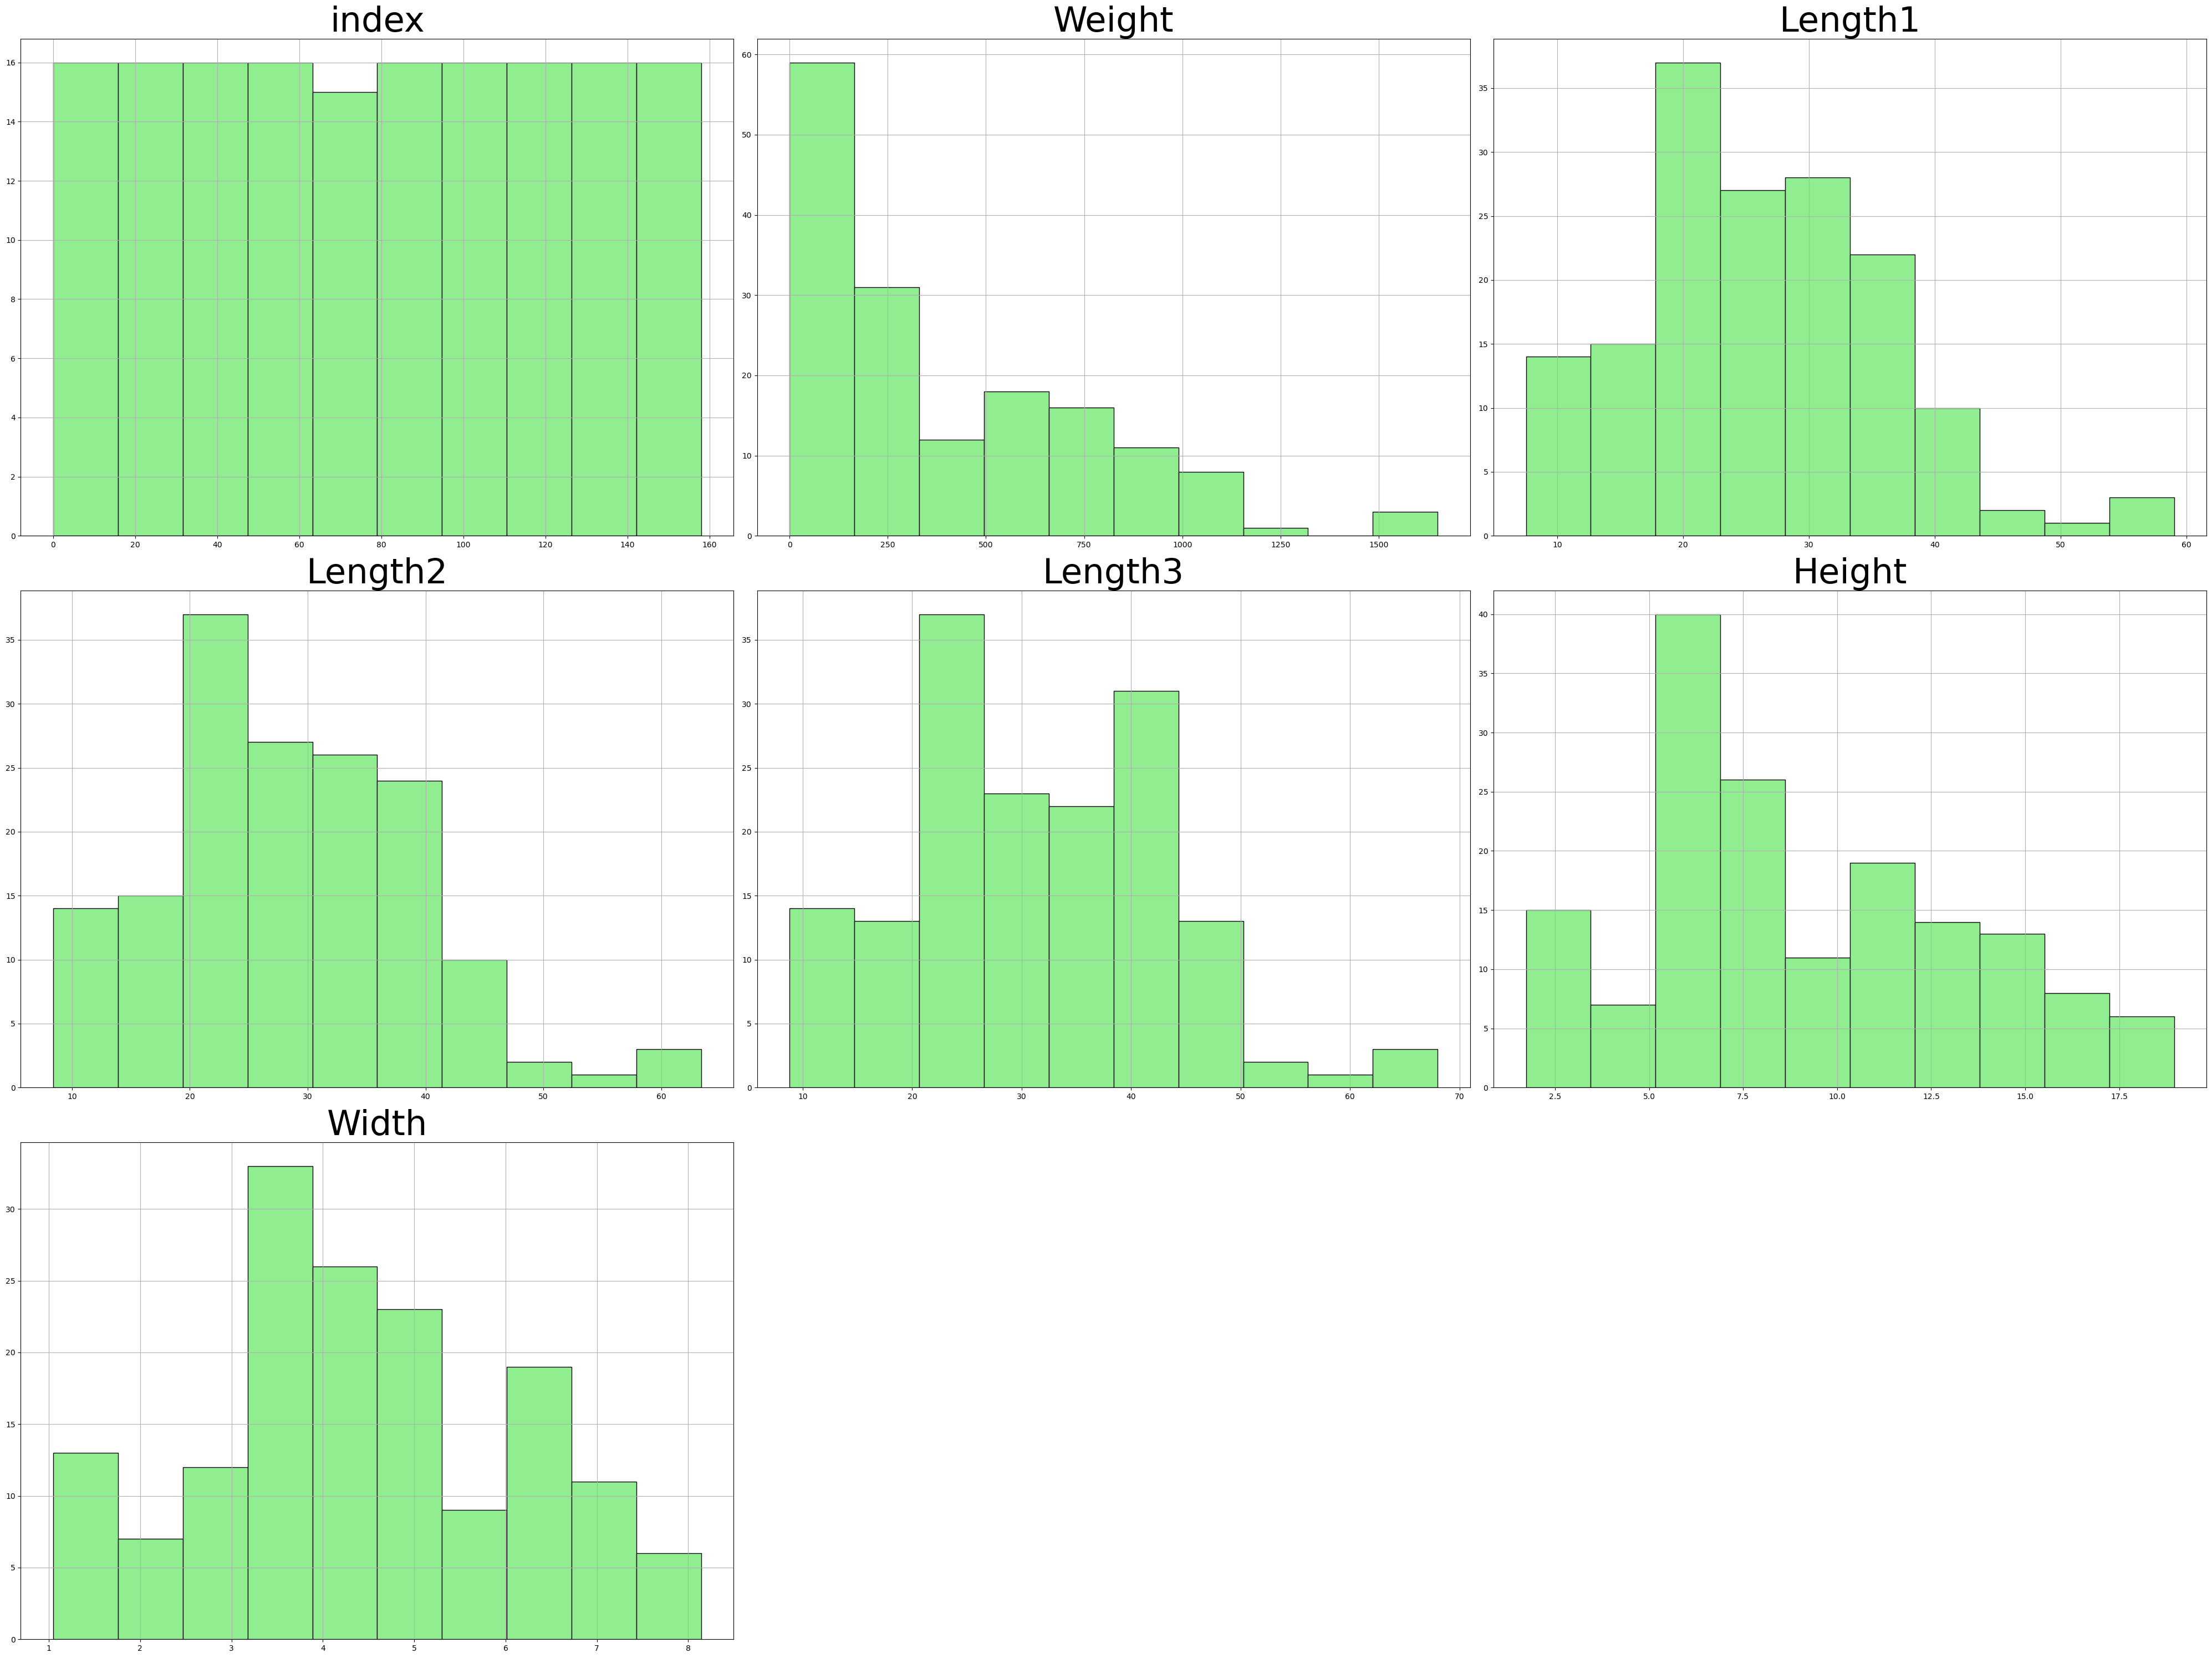

In [260]:
ax = df.hist(bins=10, ec='black', figsize=(40, 30), color='lightgreen')

for row in ax:
    for subplot in row:
        subplot.set_xlabel(subplot.get_xlabel(), fontsize=40)
        subplot.set_ylabel(subplot.get_ylabel(), fontsize=40)
        subplot.set_title(subplot.get_title(), fontsize=45)

plt.tight_layout()
plt.show()

- We can see that every Feature has different type of distribution.


- Approximately we can say that some of the features are Normally distributed and some of them have right skewed dist.

### Bar Chart for understanding the count of Species 

In [227]:
species = df.Species.value_counts()

In [261]:
species

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

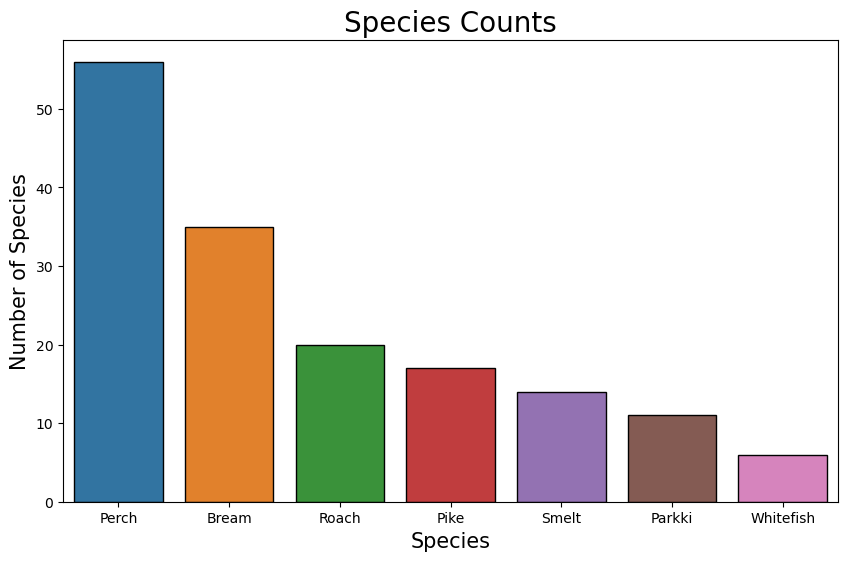

In [233]:
plt.figure(figsize=(10,6))
sns.barplot(x=species.index,y=species.values,ec='black')
plt.title("Species Counts",size=20)
plt.xlabel("Species",size=15)
plt.ylabel("Number of Species",size=15)
plt.show()

### Bar Chart for understanding the count of Species

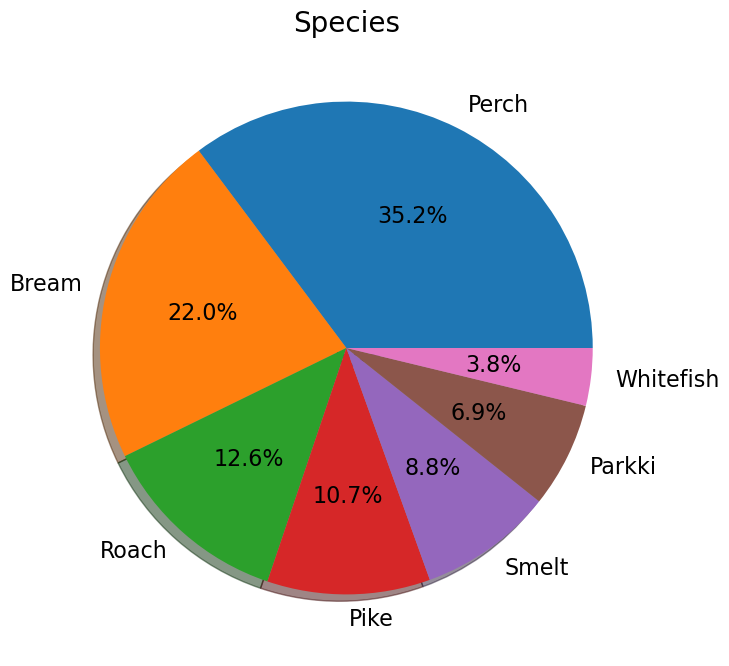

In [287]:
plt.figure(figsize=(15,8))
plt.pie(species,autopct="%1.1f%%",labels=species.index , shadow=True ,textprops={'fontsize': 16} )
plt.title("Species",size=20)
plt.show()

- In this bar plot and Pie Chart we can see that most of the number of Species are Perch and Bream and 
Species are present in very small amount as compared to these two.


- These two Species contains more than 57% .

### Reset Index for some of the plots

In [235]:
df.reset_index(inplace=True)

In [236]:
df.head()

,index,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Scatter Plot of Species according to their Weights

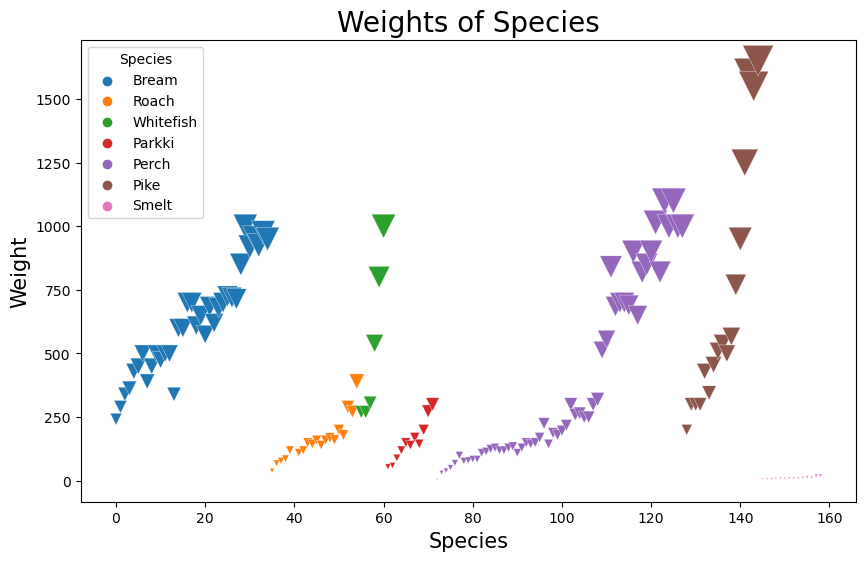

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.index,y=df.Weight,hue=df.Species,marker='v',s=df.Weight*0.3)
plt.title("Weights of Species",size=20)
plt.xlabel("Species",size=15)
plt.ylabel("Weight",size=15)
plt.show()

- As we can see that the small weighted Species are Bream , Roach , Whitefish , Parkki , Smelt .


- The High weighted species are Perch and Pike . 



### Line Plot to understand the relation between Weight and Hieght of fishes

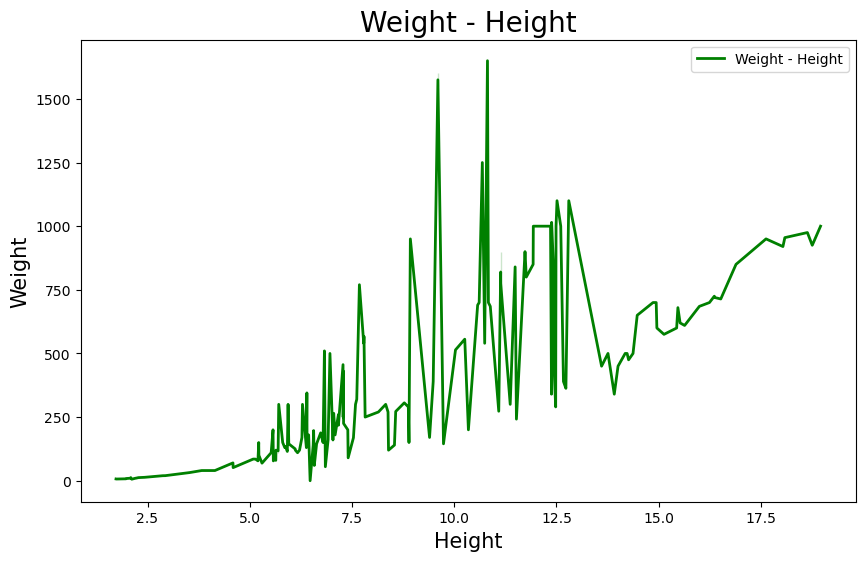

In [265]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Height,y=df.Weight,color='g',label='Weight - Height' ,linewidth = 2)
plt.title('Weight - Height',size=20)
plt.xlabel("Height",size=15)
plt.ylabel("Weight",size=15)
plt.show()

- We can see that these two features are positively correlated.


- It is seen in the graph when height is around 10 then the weight is highest.


### Line Plot to understand the relation between Weight and  of Width

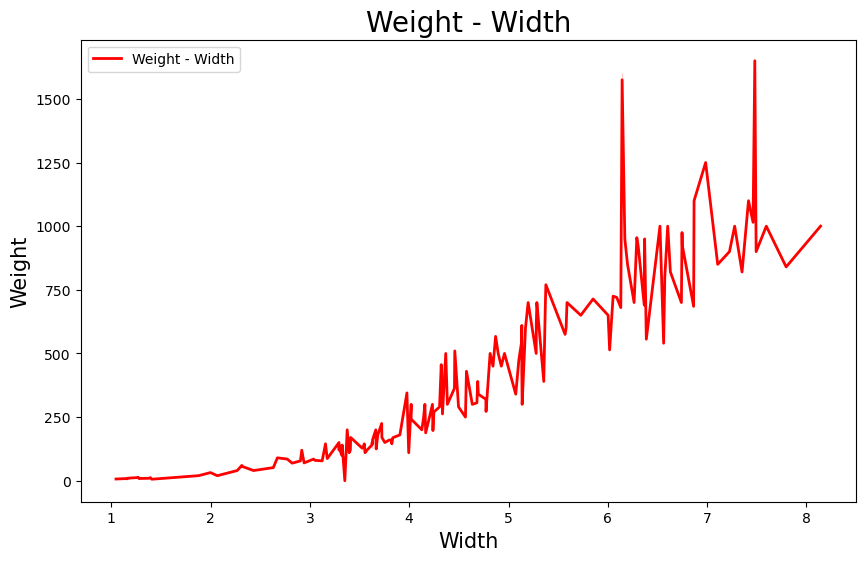

In [268]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Width,y=df.Weight,color='r',label='Weight - Width' ,linewidth = 2)
plt.title('Weight - Width',size=20)
plt.xlabel("Width",size=15)
plt.ylabel("Weight",size=15)
plt.show()

- We can see that these two features are positively correlated.


- It is seen in the graph when width increases the weight of the fishes is also increasing.


### Line Plot to understand the relation between Height and of Width

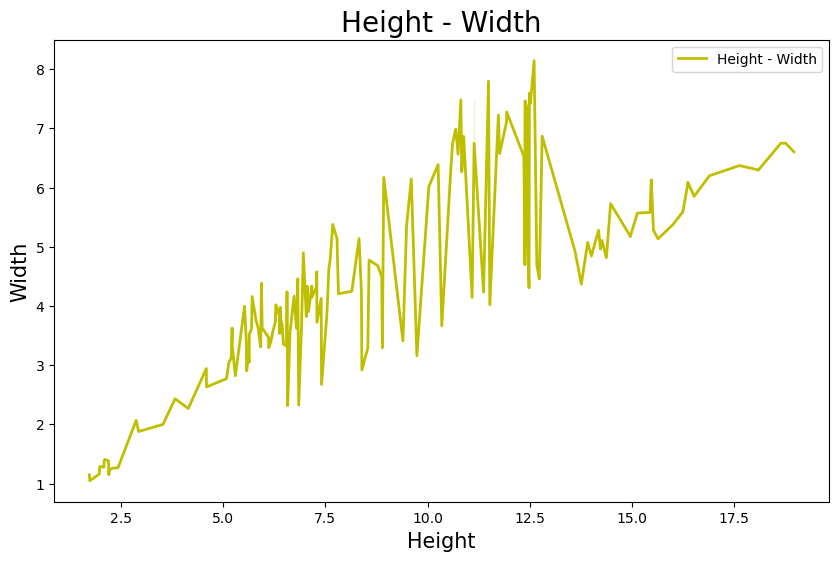

In [275]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Height,y=df.Width,color='y',label='Height - Width' ,linewidth = 2)
plt.title('Height - Width',size=20)
plt.xlabel("Height",size=15)
plt.ylabel("Width",size=15)
plt.show()

- We can see that these two features are positively correlated.


- It is seen in the graph when height is around 7 to 12 the Width is more.


### Adding a length column in which the mean of three length's is present .

In [272]:
df['Length_mean'] = df[['Length1', 'Length2', 'Length3']].mean(axis=1)

In [273]:
df['Length_mean']

0      26.200000
1      27.166667
2      27.166667
3      29.600000
4      29.833333
         ...    
154    12.366667
155    12.533333
156    12.966667
157    14.233333
158    15.000000
Name: Length_mean, Length: 159, dtype: float64

### Line Plot to understand the relation between Weight and of Length Mean

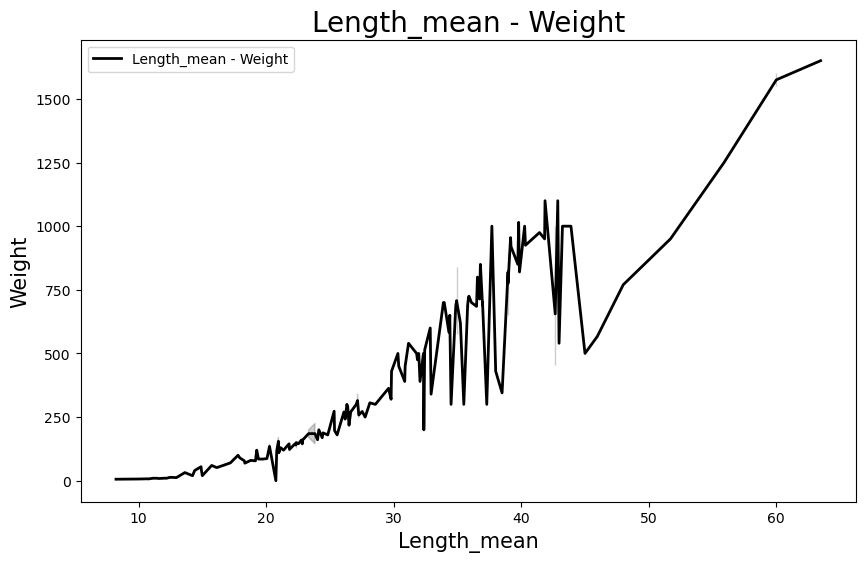

In [277]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Length_mean,y=df.Weight,color='black',label='Length_mean - Weight' ,linewidth = 2)
plt.title('Length_mean - Weight',size=20)
plt.xlabel("Length_mean",size=15)
plt.ylabel("Weight",size=15)
plt.show()

- We can see that these two features are positively correlated.


- It is seen in the graph when Length_mean is around 30 to 45 the Weight is more.


# Model Training

### Deviding the data set into dependent and independent variables

In [288]:
df.head()

,index,Species,Weight,Length1,Length2,Length3,Height,Width,Length_mean
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333


### Dependent

In [291]:
x = df.drop(columns = ['Weight','Species','Length_mean','index'] ,axis = 1)

In [292]:
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


### Target 

In [293]:
y = df.Weight

In [294]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

### Using sklearn's Train_Test_Split deviding it into Training and Testing data set

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=25)

In [297]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((127, 5), (32, 5), (127,), (32,))

### Training the Model using Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
regressor = LinearRegression()

In [197]:
regressor.fit(x_train,y_train)

LinearRegression()

### Testing The Model

In [198]:
y_pred = regressor.predict(x_test)

In [199]:
y_pred

array([ 691.77082099,  678.0076167 ,   26.8420308 ,  234.3479646 ,
        172.81108672,  660.24672765,  192.86606618, -144.79682989,
        102.8583623 ,  872.05301924,  703.10591224,  139.61064576,
        787.47102525,  164.16498171,  473.19491511,  535.90335803,
        153.04202307,  784.40591669,   96.12360762,  295.13335688,
        192.19005383,  103.36743503,  792.77271965,  294.41046958,
       1091.50466015,  155.79632392,  902.8405862 ,  877.06159977,
         62.84114546,   80.59615574,  488.53571752,  242.45588905])

### Calculating the accuracy of the model using mean_squred_error

In [298]:
from sklearn.metrics import mean_squared_error

In [299]:
mse = mean_squared_error(y_pred,y_test)

In [300]:
rmse = np.sqrt(mse)

In [301]:
rmse

92.23517249852151

### As we can see that the model is trained very successfully and it's accuracy is 92% .

### Random Example Prediction 

In [207]:
regressor.predict([[23.9,26.5,31.1,12.3778,4]])

array([352.36205201])

- In this example prediction we provided all the necessory values to the model .


- According to the provided features like height , length , width it predicted that the weight will be 352 .


## Conclusion


In this project, we successfully built a linear regression model to predict the weight of fish based on their physical dimensions. The model demonstrated a significant relationship between the dimensions (lengths, height, and width) and the weight of the fish. Key findings include:

- Fish dimensions such as Length1, Length2, Length3, Height, and Width are good predictors of fish weight.


- The model can accurately estimate the weight of Bream species given their measurements.



## Future Work


While this project provides valuable insights, there are several areas for future exploration:

1. **Incorporate More Species**: Extend the dataset to include multiple fish species to create a more generalized model.


2. **Feature Engineering**: Explore additional features or transformations of existing features to improve model performance.


3. **Advanced Models**: Apply more advanced regression techniques or machine learning algorithms to enhance prediction accuracy.


4. **Cross-validation**: Implement cross-validation techniques to better assess model performance and prevent overfitting.


5. **Environmental Factors**: Include environmental factors such as water temperature, pH levels, and habitat conditions to understand their impact on fish weight.

By addressing these areas, future research can further improve the robustness and applicability of the predictive model in various practical scenarios.



## Acknowledgments


#### We would like to thank the contributors of the fish dataset for making this study possible. Their efforts in collecting and sharing the data have provided a valuable resource for predictive modeling and fisheries research.
